# Boston_Housing - Regression Analysis

## Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.15.0'

* GPU 설정 OFF

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [4]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

* <font color = 'blue'>'boston.csv' (506 * 14)</font>

 - CRIM: 범죄 발생률
 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
 -  INDUS: 비소매 상업 지역 비율
 - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
 - NOX: 일산화질소 농도
 - RM: 거주 목적 방 개수
 - AGE: 1940년 이전 건축된 주택 비율
 - DIS: 보스턴 5대 고용지역까지 거리
 - RAD: 고속도로 접근성
 - TAX: 10,000달러당 재산세율
 - PTRATIO: 교사와 학생 수 비율
 - B: 흑인 거주 비율
 - LSTAT: 하위 계층 비율
 - <font color = 'red'>PRICE: 주택 가격 -> 'y'

In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data

In [6]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = X_train - mean
X_train = X_train / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [9]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

In [10]:
boston.compile(loss = 'mse',
               optimizer = 'adam',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 8분

In [11]:
# %%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 5s 3ms/step - loss: 198.2597 - mae: 10.0051 - val_loss: 48.8681 - val_mae: 4.0800
Epoch 2/500
323/323 [==============================] - 1s 3ms/step - loss: 27.3682 - mae: 3.6675 - val_loss: 29.7038 - val_mae: 3.3341
Epoch 3/500
323/323 [==============================] - 1s 3ms/step - loss: 17.7759 - mae: 2.9917 - val_loss: 22.1203 - val_mae: 3.2716
Epoch 4/500
323/323 [==============================] - 1s 3ms/step - loss: 14.8440 - mae: 2.7140 - val_loss: 16.4151 - val_mae: 2.6227
Epoch 5/500
323/323 [==============================] - 1s 3ms/step - loss: 12.9867 - mae: 2.5566 - val_loss: 16.1653 - val_mae: 2.4684
Epoch 6/500
323/323 [==============================] - 1s 3ms/step - loss: 12.4569 - mae: 2.5283 - val_loss: 17.8605 - val_mae: 2.5968
Epoch 7/500
323/323 [==============================] - 1s 3ms/step - loss: 11.2637 - mae: 2.3762 - val_loss: 12.3306 - val_mae: 2.3930
Epoch 8/500
323/323 [==============================] 

> ## 4) 학습 결과 시각화

* 전체 시각화

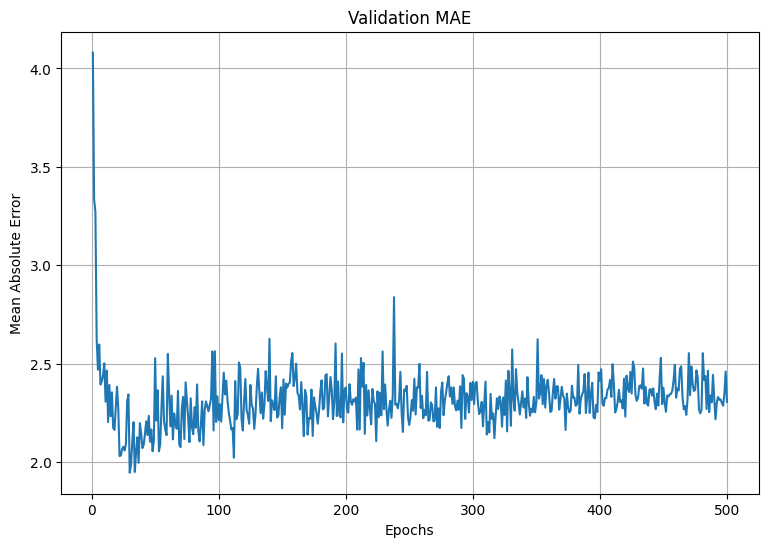

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

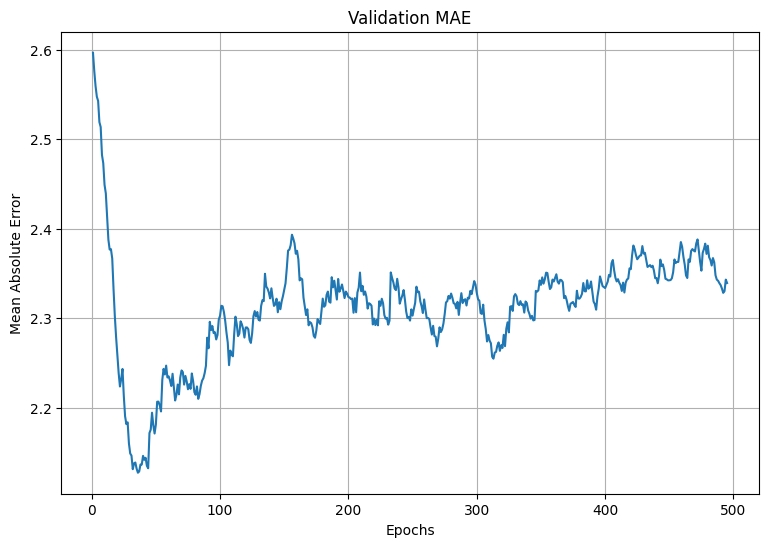

In [13]:
# 보기 편하게 스무딩해주자
# 스케일 차이가 큰 첫 5개 포인트는 제외하고
# 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체한다.
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [14]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 12ms/step - loss: 14.9737 - mae: 2.5369
MAE is : 2.5369460582733154


> ## 6) Keras Session Clear

In [15]:
# 대용량 데이터 학습 시 GPU메모리 부족 에러 대응
# 모델 생성 후에는 꼭 클리어해주자.
from tensorflow.keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'adam',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

> ## 3) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [19]:
# %%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
308/323 [===========================>..] - ETA: 0s - loss: 220.9156 - mae: 11.1310
Epoch 1: val_mae improved from inf to 4.45362, saving model to best_boston.h5
323/323 [==============================] - 2s 4ms/step - loss: 212.6321 - mae: 10.8886 - val_loss: 57.2428 - val_mae: 4.4536
Epoch 2/500
308/323 [===========================>..] - ETA: 0s - loss: 29.3202 - mae: 3.6682
Epoch 2: val_mae improved from 4.45362 to 3.10916, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 28.3373 - mae: 3.6055 - val_loss: 34.1385 - val_mae: 3.1092
Epoch 3/500
306/323 [===========================>..] - ETA: 0s - loss: 21.0895 - mae: 3.0494
Epoch 3: val_mae improved from 3.10916 to 2.99849, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 20.3361 - mae: 3.0057 - val_loss: 29.4049 - val_mae: 2.9985
Epoch 4/500
309/323 [===========================>..] - ETA: 0s - loss: 16.2931 - mae: 2.6697
Epoch 4: val_

> ## 5) Best Model

In [20]:
# !ls -l

> ## 6) Model Evaluate

In [21]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston.h5')

In [22]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 16.5860 - mae: 2.3823
MAE is : 2.382256269454956


# The End